In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.insert(0, '../python/')

from multi_zone import MultiZoneRegression
from utils import RMSE, load_data
from plot import multiplot, interactive_plot

import warnings
warnings.filterwarnings('ignore')

# Multi-zone Regression

In [2]:
rooms = ["Dining", "Kitchen", "Living", "Room1", "Bathroom", "Room2", "Room3"]
(X, y, y0), time = load_data(rooms)
area = [3.94*4.19, 3.87*4.19, 5.53*8, 4.93*4.19, 4*3.88, 5.53*4, 3.15*4]

X_train = X
y_train = y 

X_test = X.T
y_test = y

In [3]:
initial_values = [[0.06182156778376106, 0.0749887623315032, 0.03316719143573819, 0.027307780535860394, 100045.41534846032, 180090.52074712413, 140052.30557245263, 157420.4671327087, 0.0005513007907163018, 0.0003127304021537693, 0.0007896110482060354, 0.00046252792966360967, 10.818001865781614, 3.4359833298667835, 14.181284675132233, 15.902885926258943, 1.328588305735277, 0.2642941719243602, 0.7050050860776521, 1.6202399178695486, 0.008987163810561829, 0.009140283672680133, 0.0010680438227600167, 0.0030253122904294613, 6.43389272693952, 3.131926598807814, 7.619499279460701, 0.5120405980263844], [0.09171090146684578, 760408.4304923413, 0.0003787033433409323, 19.655354467969204, 0.9242661418954752, 0.00623140199770482], [0.049662587830052396, 0.045302422014255876, 331049.9494355935, 288884.479706025, 5.430726901752457e-05, 0.0008677888736584226, 6.690378996302655, 8.159967161957475, 0.5542480584864252, 1.722986781204003, 0.004421277384190755, 0.004422336082008265, 7.284342826442408, 1.3099180939378785]] #[[0.05843930978544914, 0.023313151108612273, 0.024326383209742834, 0.023747343706946554, 206095.73454897694, 283610.23481453623, 453009.8269086923, 454770.66787473555, 0.00044161240339567014, 0.0008714481522003666, 0.0007125172253438125, 0.000269660687078218, 8.391825764283158, 0.9453064762556607, 3.471764469377507, 1.9361236921939213, 1.801797454230184, 0.4930706914390761, 1.9639786905293377, 0.7328134754642393, 0.0026213510739152065, 0.004760484360382691, 0.003103925159605789, 0.004384867716064679, 7.97012393007179, 6.414139599892697, 5.294367873450661, 7.882199825140355], [0.0630463533285416, 816345.0143836166, 0.0003762057537744477, 1.2237534152562928, 1.9761897731209184, 0.00927095459544115], [0.013295436085263172, 0.08980413825535054, 796899.5657590895, 705726.7827746997, 0.0002778443798904751, 0.00048247895077440566, 3.9008296254063404, 11.267820269281211, 1.0785097722814874, 0.7792242665757537, 0.0077154296927956735, 0.00105345781336434, 3.6343596250993557, 8.670678845732407]]

In [4]:
fit = False
house = np.array([[False, True, False, True, False, False, False],
                [True, False, False, False, True, False, False],
                [False, False , False, False, False, False, False],
                [True, False, False, False, True, False, False],
                [False, True, False, True, False, False, False],
                [False, False, False, False, False, False, True],
                [False, False, False, False, False, True, False]
                ])

multi_zone = MultiZoneRegression(house, area, initial_values)

### Find new parameters

In [5]:
if fit:
    multi_zone.fit(X_train, y_train, area)  # gamma = 10

for i, room in enumerate(multi_zone.rooms):
    print("{} = multi_zone.rooms[{}]".format(rooms[i], i))
    print("{}.R = {}".format(rooms[i],room.R))
    print("{}.C = ".format(rooms[i]), room.C,)
    print("{}.m = ".format(rooms[i]), room.m,)
    print("{}.a = ".format(rooms[i]), room.a,)
    print("{}.k = ".format(rooms[i]), room.k,)
    print("{}.gs = ".format(rooms[i]), room.gs,)
    print("{}.Rab = ".format(rooms[i]), room.Rab, "\n")

Dining = multi_zone.rooms[0]
Dining.R = 0.0
Dining.C =  0.0
Dining.m =  0.0
Dining.a =  0.0
Dining.k =  0.0
Dining.gs =  0.0
Dining.Rab =  [] 

Kitchen = multi_zone.rooms[1]
Kitchen.R = 0.0
Kitchen.C =  0.0
Kitchen.m =  0.0
Kitchen.a =  0.0
Kitchen.k =  0.0
Kitchen.gs =  0.0
Kitchen.Rab =  [] 

Living = multi_zone.rooms[2]
Living.R = 0.0
Living.C =  0.0
Living.m =  0.0
Living.a =  0.0
Living.k =  0.0
Living.gs =  0.0
Living.Rab =  [] 

Room1 = multi_zone.rooms[3]
Room1.R = 0.0
Room1.C =  0.0
Room1.m =  0.0
Room1.a =  0.0
Room1.k =  0.0
Room1.gs =  0.0
Room1.Rab =  [] 

Bathroom = multi_zone.rooms[4]
Bathroom.R = 0.0
Bathroom.C =  0.0
Bathroom.m =  0.0
Bathroom.a =  0.0
Bathroom.k =  0.0
Bathroom.gs =  0.0
Bathroom.Rab =  [] 

Room2 = multi_zone.rooms[5]
Room2.R = 0.0
Room2.C =  0.0
Room2.m =  0.0
Room2.a =  0.0
Room2.k =  0.0
Room2.gs =  0.0
Room2.Rab =  [] 

Room3 = multi_zone.rooms[6]
Room3.R = 0.0
Room3.C =  0.0
Room3.m =  0.0
Room3.a =  0.0
Room3.k =  0.0
Room3.gs =  0.0
Room3.Rab 

# Rooms parameters

## Set best rooms parameters

In [8]:
for i, room in enumerate(multi_zone.rooms):
    print("{};{};{};{};{};{};{};{}".format(rooms[i], area[i], room.R, room.C, room.m, room.a, room.k, room.gs))

Dining;16.5086;0.08705215583493366;1316623.9101518856;0.0053241419909227615;0.012963508154211736;3.8501678672604e-05;0.003974463503095047
Kitchen;16.215300000000003;0.05511557713764909;2811551.4088770924;0.011111375897285449;4.046409843185994;1.2442186439280044e-05;0.00766535429152145
Living;44.24;0.035239438327118615;2287354.4863172104;0.006394006048548277;2.2412215391892496;5.25787058645177e-05;0.0018003693401619496
Room1;20.6567;0.05912584436141776;4387092.741697961;0.00902658804998515;30.05523408968866;2.5565690793273325e-05;0.007675218805971147
Bathroom;15.52;0.022874512518973027;1482003.4916086262;0.011127769189433551;8.176050677705527;1.2688267487536067e-05;0.013658242381980096
Room2;22.12;0.019999437102437304;8118478.5817091;0.01332618354558747;103.07986631782042;0.0005614558895854505;0.014665662304079995
Room3;12.6;0.013036240518587688;11340806.371464225;0.003793084133222444;256.67225854133903;6.185115335864815e-07;0.05117275920057731


In [5]:
Dining = multi_zone.rooms[0]
Dining.R = 0.08705215583493366
Dining.C =  1316623.9101518856
Dining.m =  0.0053241419909227615
Dining.a =  0.012963508154211736
Dining.k =  3.8501678672604e-05
Dining.gs =  0.003974463503095047
Dining.Rab =  [5.84805019e+02, 5.27935520e-02] 

Kitchen = multi_zone.rooms[1]
Kitchen.R = 0.05511557713764909
Kitchen.C =  2811551.4088770924
Kitchen.m =  0.011111375897285449
Kitchen.a =  4.046409843185994
Kitchen.k =  1.2442186439280044e-05
Kitchen.gs =  0.00766535429152145
Kitchen.Rab =  [5.84805019e+02, 8.77791573e-03] 

Living = multi_zone.rooms[2]
Living.R = 0.035239438327118615
Living.C =  2287354.4863172104
Living.m =  0.006394006048548277
Living.a =  2.2412215391892496
Living.k =  5.25787058645177e-05
Living.gs =  0.0018003693401619496
Living.Rab =  [] 

Room1 = multi_zone.rooms[3]
Room1.R = 0.05912584436141776
Room1.C =  4387092.741697961
Room1.m =  0.00902658804998515
Room1.a =  30.05523408968866
Room1.k =  2.5565690793273325e-05
Room1.gs =  0.007675218805971147
Room1.Rab =  [0.05279355, 0.01007886] 

Bathroom = multi_zone.rooms[4]
Bathroom.R = 0.022874512518973027
Bathroom.C =  1482003.4916086262
Bathroom.m =  0.011127769189433551
Bathroom.a =  8.176050677705527
Bathroom.k =  1.2688267487536067e-05
Bathroom.gs =  0.013658242381980096
Bathroom.Rab =  [0.00877792, 0.01007886] 

Room2 = multi_zone.rooms[5]
Room2.R = 0.019999437102437304
Room2.C =  8118478.5817091
Room2.m =  0.01332618354558747
Room2.a =  103.07986631782042
Room2.k =  0.0005614558895854505
Room2.gs =  0.014665662304079995
Room2.Rab =  [0.00365828] 

Room3 = multi_zone.rooms[6]
Room3.R = 0.013036240518587688
Room3.C =  11340806.371464225
Room3.m =  0.003793084133222444
Room3.a =  256.67225854133903
Room3.k =  6.185115335864815e-07
Room3.gs =  0.05117275920057731
Room3.Rab =  [0.00365828]

# Model evalutation

## RMSE

In [6]:
y_pred = multi_zone.predict_all(X_test, y0)
total_rmse = 0
for i in range(7):
    rmse = RMSE(y_pred[i], y_test[i])
    total_rmse += rmse
    print("{} : {}".format(i, rmse))

print("Total rmse:", total_rmse)

0 : 1.0254690222048921
1 : 0.9979446778849543
2 : 1.5978244463795652
3 : 0.7641586292935171
4 : 0.9331715806651104
5 : 0.5243675956713553
6 : 0.844228805920174
Total rmse: 6.687164758019569


# Plots

## Rooms

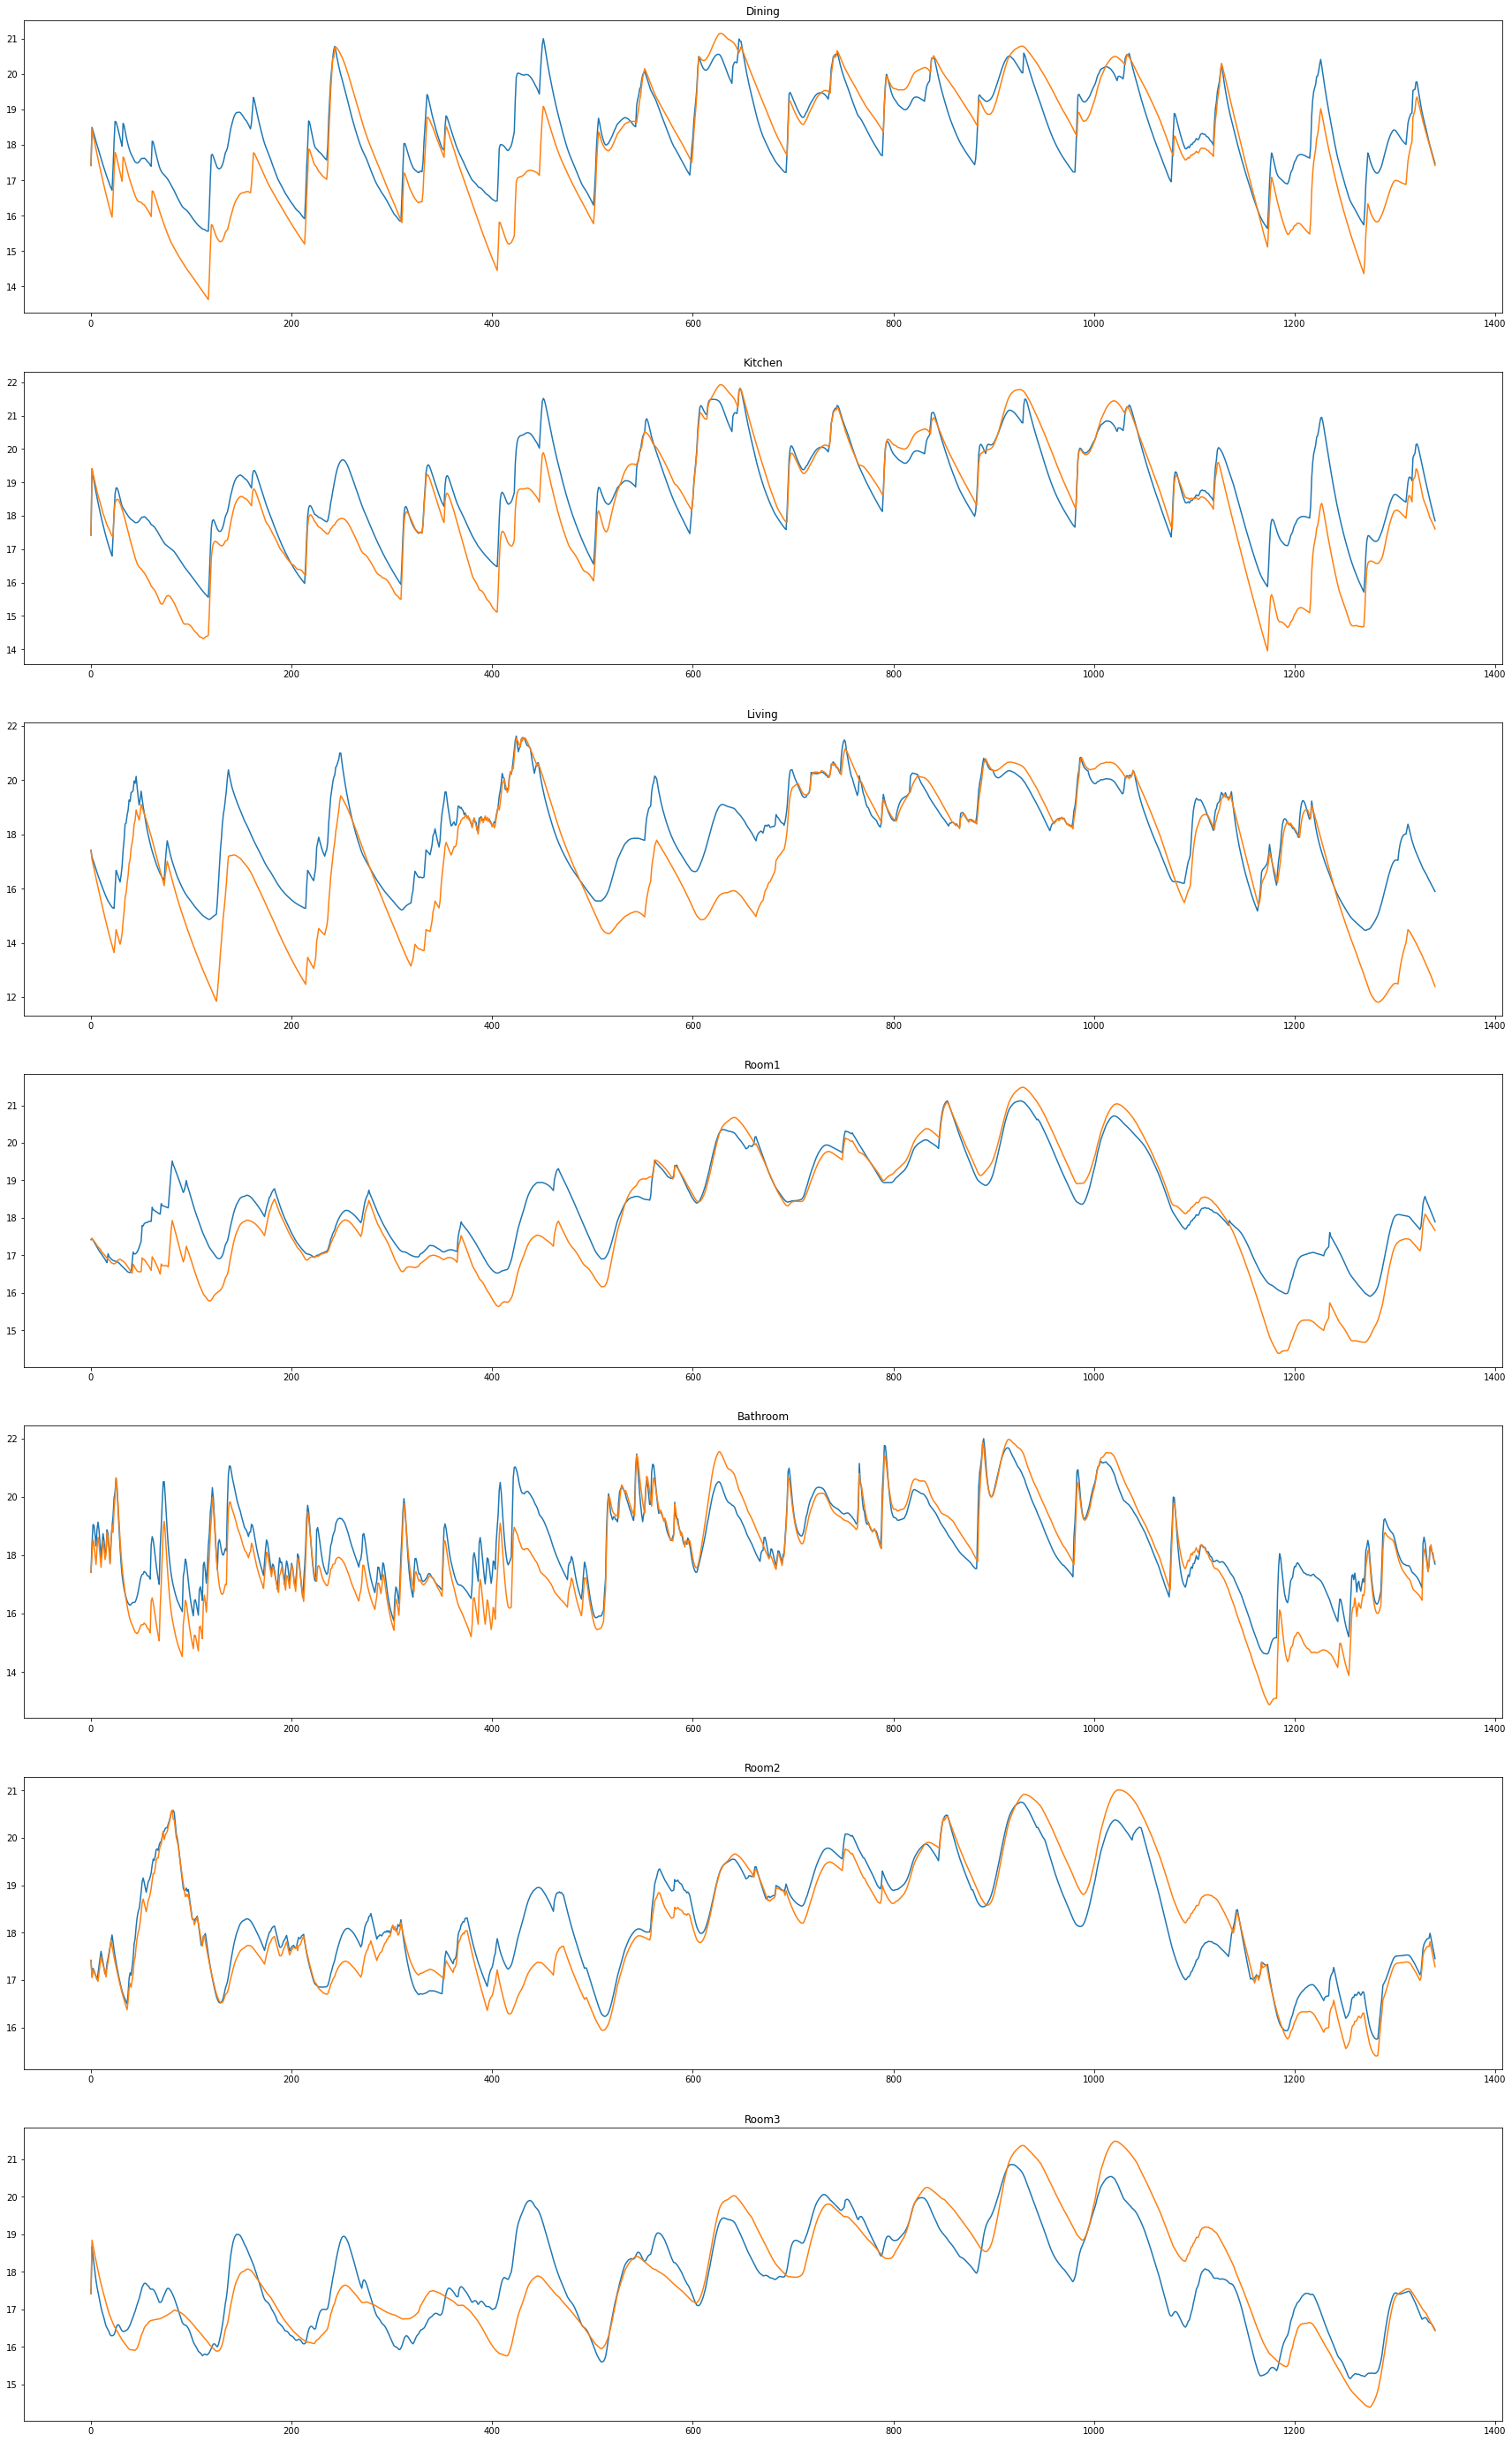

In [7]:
df = [pd.DataFrame({"y_Test": np.concatenate(([y0[0]], y_test[i])), "y_Pred": np.concatenate(([y0[0]], y_pred[i]))}) for i in range(len(rooms))]

multiplot(7, 1, 0, df, rooms, plt.plot, figsize=(30, 50))

## Residuals

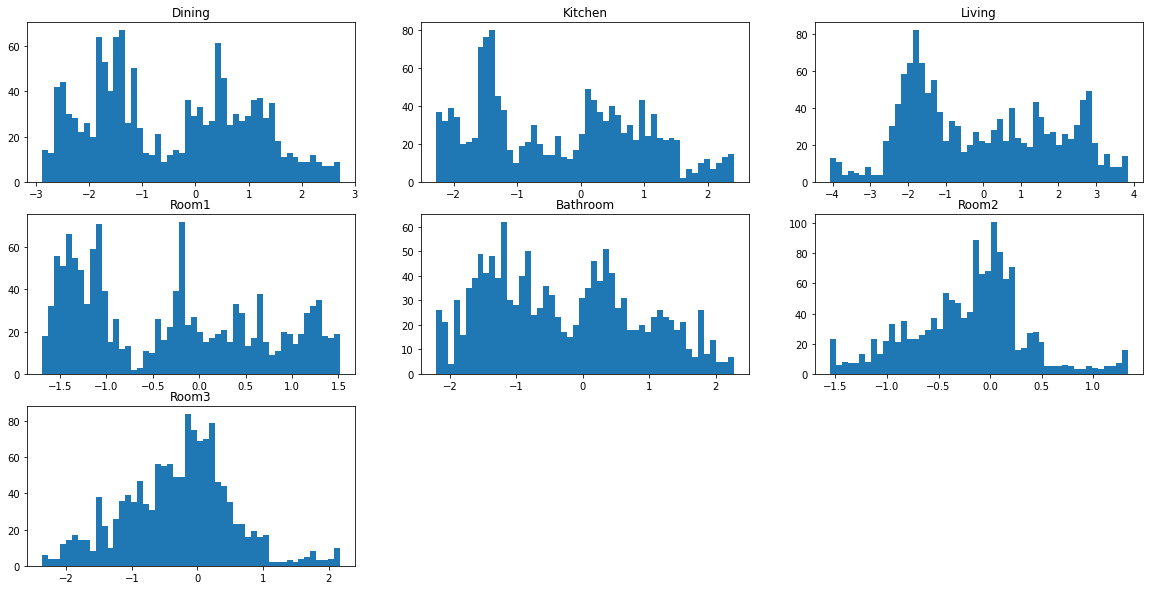

In [ ]:
residuals = y - y_pred
multiplot(3, 3, 2, residuals, rooms, plt.hist, figsize=(20, 10), bins=50)

# Real Clean Plots

In [ ]:
import plotly as py

py.offline.init_notebook_mode(connected=True)

room_nb = 1

In [ ]:

interactive_plot(rooms, room_nb, y_test, y_pred, time, X_test.T[room_nb])